In [1]:
%run __init__.py
%load_ext autoreload
%autoreload 2

In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/konstantin/.local/lib/python3.6/site-packages/m

In [34]:
import Net.source.core.experiment as exp

from Net.source.utils.run_utils import load_config, prepare_dataset_config

dataset_config = load_config('../configs/analyze.yaml')
model_config = load_config('../configs/model.yaml')

mode = 'analyze'
dataset_name = 'hpatches_view'

dataset_config[exp.DATASET] = prepare_dataset_config(dataset_config[exp.DATASET], mode, dataset_name)

In [35]:
from Net.source.datasets.dataset import create_dataset, create_loader

dataset = create_dataset(dataset_config[exp.DATASET][mode], model_config[exp.MODEL][exp.NET_VGG], mode)
loader = create_loader(dataset, dataset_config[exp.LOADER][mode])

_iter = loader.__iter__()

In [36]:
item = next(_iter)

image1 = item[du.IMAGE1]
image2 = item[du.IMAGE2]

H12 = item[du.H12]
H21 = item[du.H21]

s_image1 = item[du.S_IMAGE1]
s_image2 = item[du.S_IMAGE2]

In [37]:
from Net.source.utils.projection_utils import warp_image_H

w_image1, w_vis_mask1 = warp_image_H(image2.shape, image1, H21)
w_image2, w_vis_mask2 = warp_image_H(image1.shape, image2, H12)

In [42]:
cv_image1 = torch2cv(image1[0], to_rgb=True)
cv_image2 = torch2cv(image2[0], to_rgb=True)

cv_w_image1 = torch2cv(w_image1[0], to_rgb=True)
cv_w_image2 = torch2cv(w_image2[0], to_rgb=True)

cv_s_image1 = torch2cv(s_image1[0])
cv_s_image2 = torch2cv(s_image2[0])

cv_w_vis_mask1 = torch2cv(w_vis_mask1.float()[0], to_rgb=True)
cv_w_vis_mask2 = torch2cv(w_vis_mask2.float()[0], to_rgb=True)

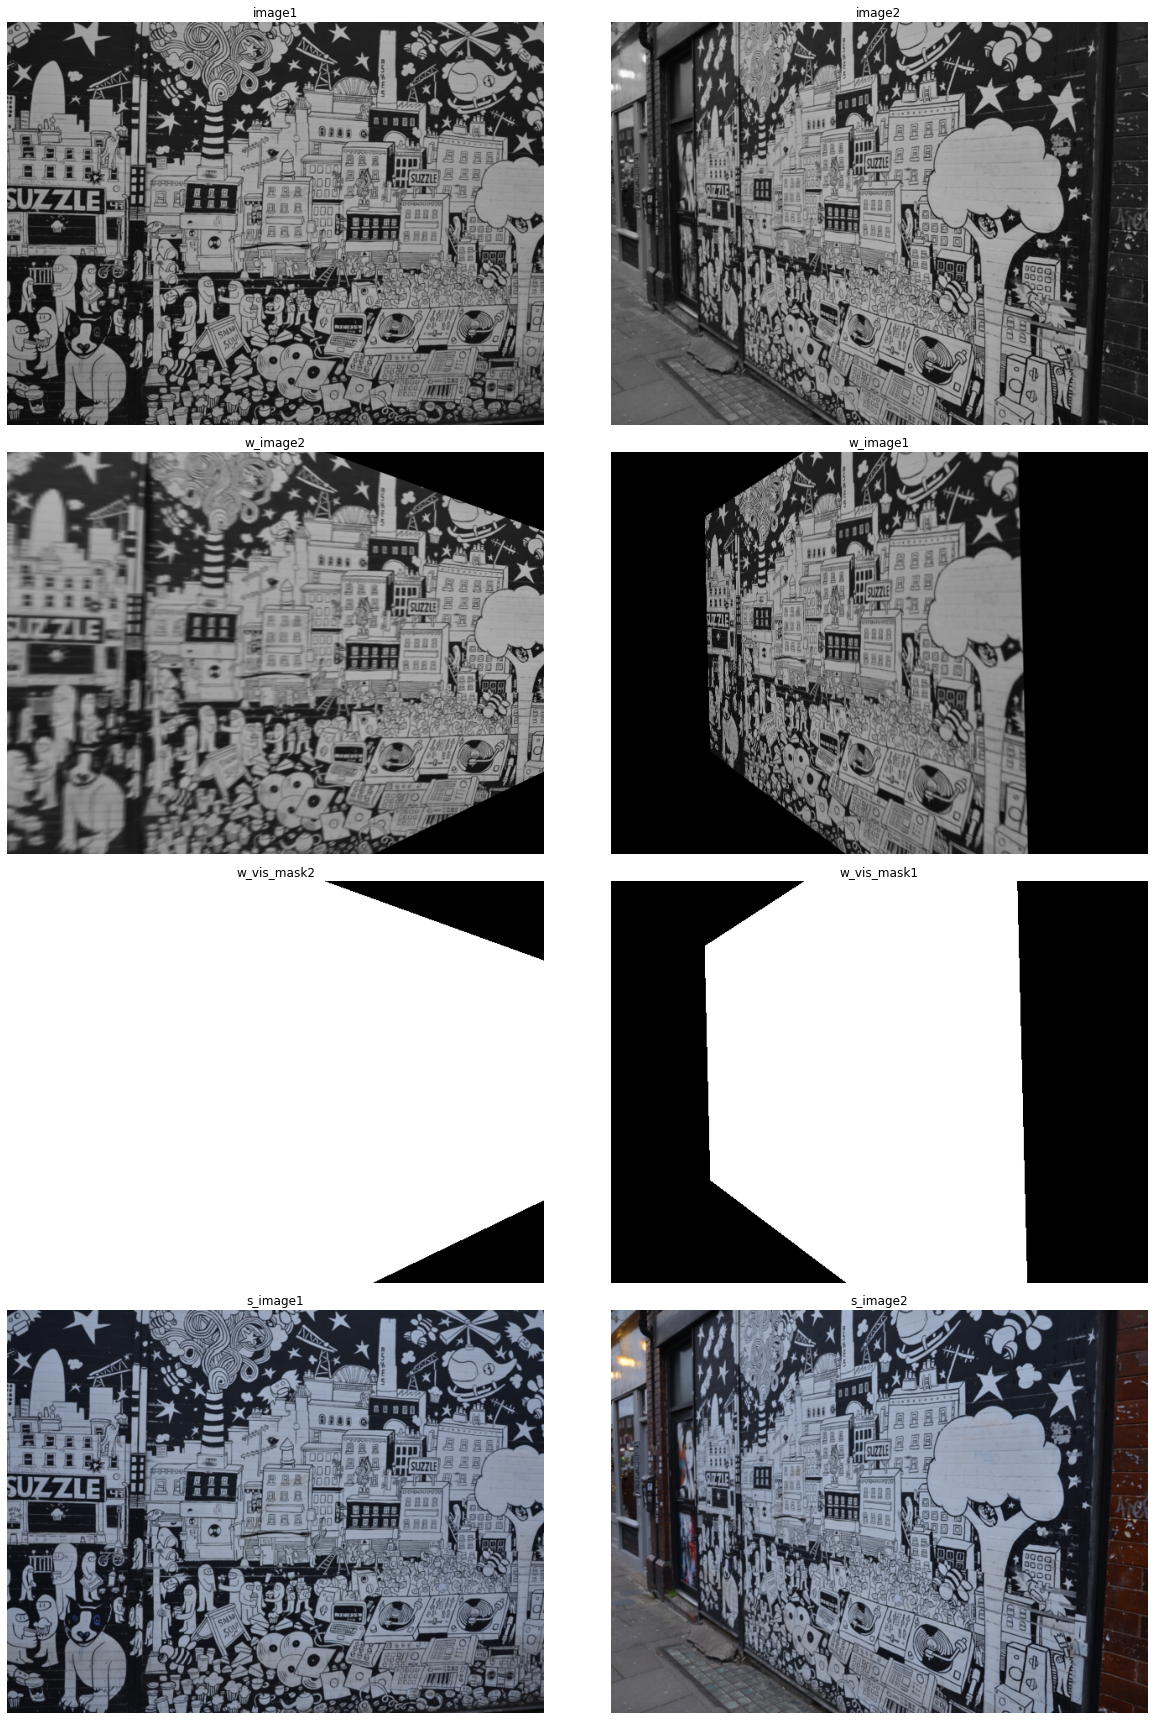

In [44]:
plot_figures({'image1': cv_image1, 'image2': cv_image2,
              'w_image2': cv_w_image2, 'w_image1': cv_w_image1,
              'w_vis_mask2': cv_w_vis_mask2, 'w_vis_mask1': cv_w_vis_mask1,
              's_image1': cv_s_image1, 's_image2': cv_s_image2}, 4, 2, (18, 24))